# Exploratory analysis using Word Cloud and Term Frequency

In [1]:
import os

# Identify the working directory and data files
working_directory = './20-word-cloud'

# Create the working directory if needed
try:
    os.makedirs(working_directory, exist_ok=True)
except OSError as error:
    print(f"Error creating {working_directory}: {error}")

In [2]:
processing_mode = 'Lemmatized'
input_directory = './16-data_preprocessing'
bag_of_words_data_file = f"{input_directory}/bag_of_words_data.csv"

In [3]:
import pandas as pd
import csv

In [4]:
# Read the bag of words into a pandas dataframe
df = pd.read_csv(bag_of_words_data_file, # The data file being read, from the variable assignment above
                 on_bad_lines='warn',           # This tells Pandas to only warn on bad lines vs causing an error
                 dtype='str')                   # This tells Pandas to treat all numbers as words

tokens = list(df.columns)
len(tokens)

1197

In [5]:
%pip install --quiet wordcloud

Note: you may need to restart the kernel to use updated packages.


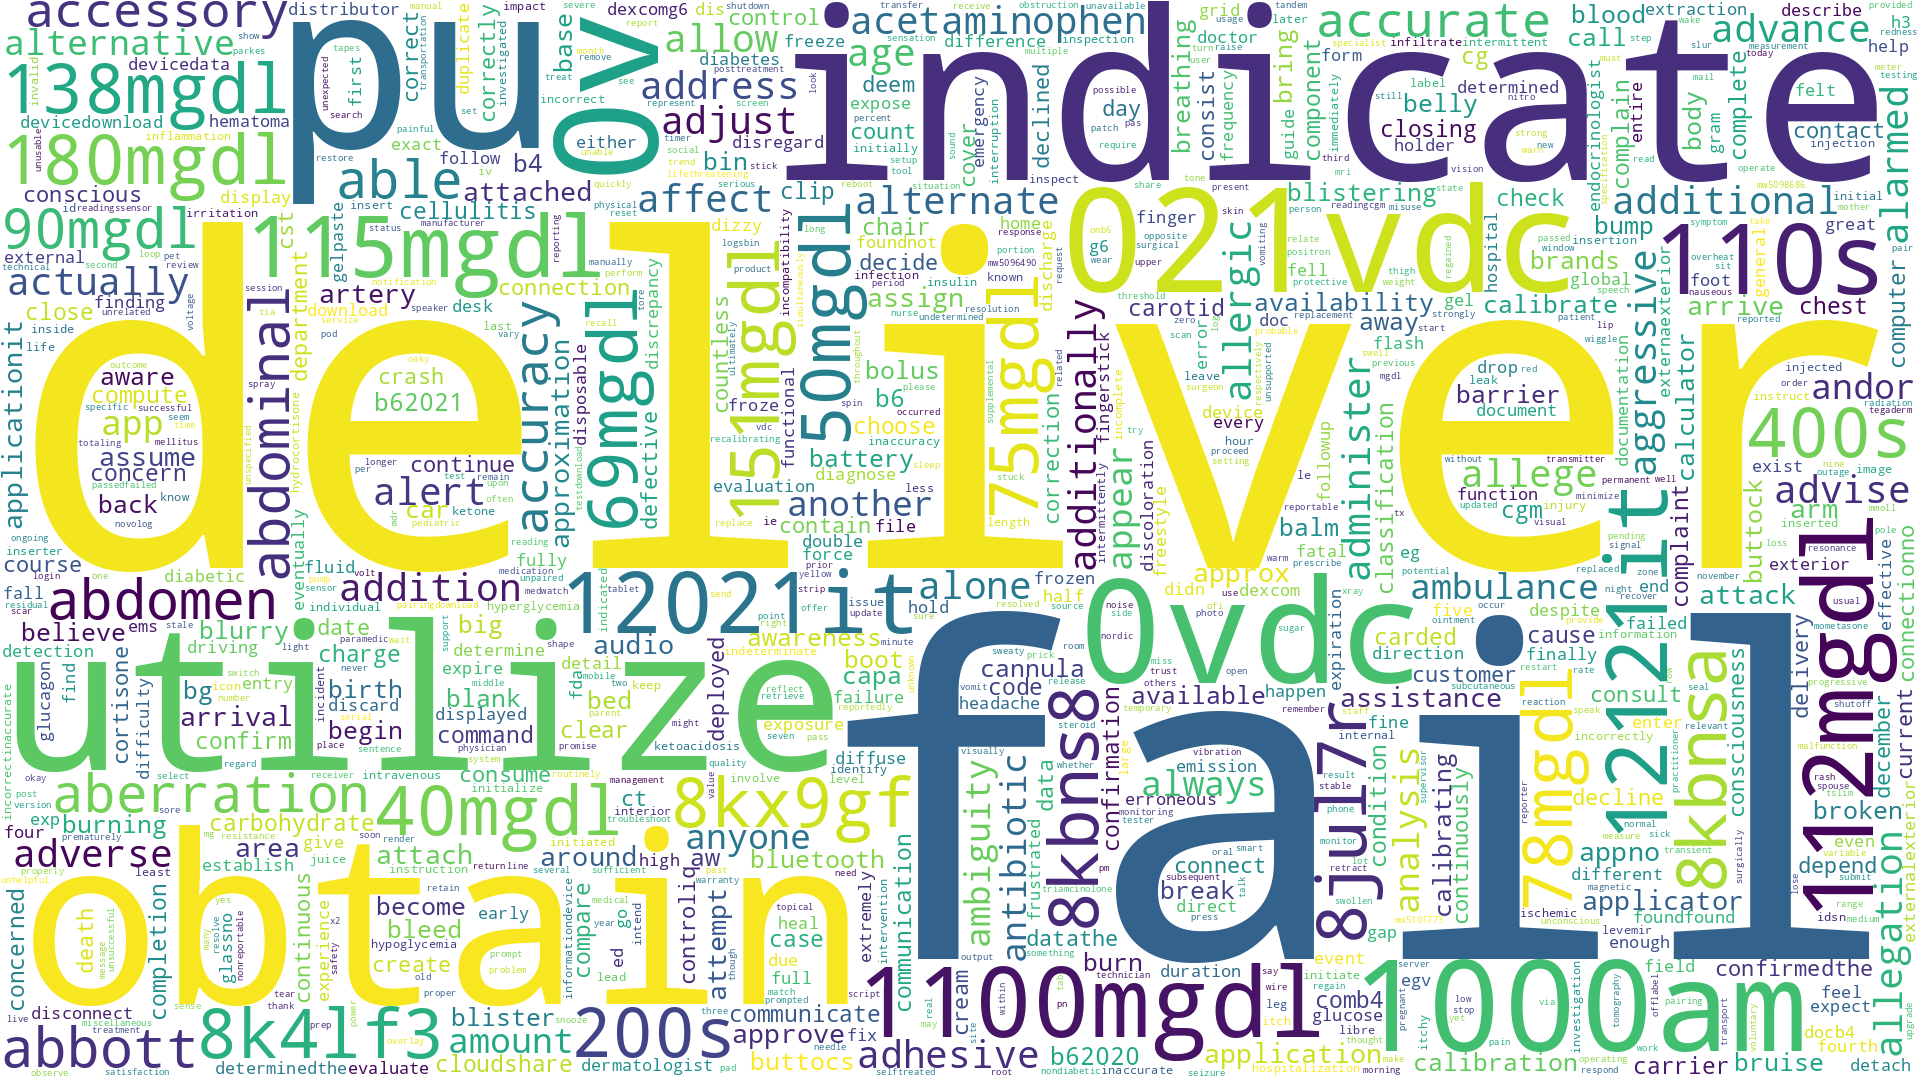

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(tokens)

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white", 
    max_words=5000, 
    contour_width=3, 
    contour_color='steelblue', 
    width=1920, 
    height=1080)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

Remove words that start with a digit

In [7]:
import re

# create a regular expression pattern to match words that start with numbers
pattern = re.compile(r'^\d+')

# filter out words that start with numbers
tokens_nonumbers = [word for word in tokens if not pattern.match(word)]

len(tokens_nonumbers)

921

In [8]:
print(f"{len(tokens) - len(tokens_nonumbers)} words were removed")

276 words were removed


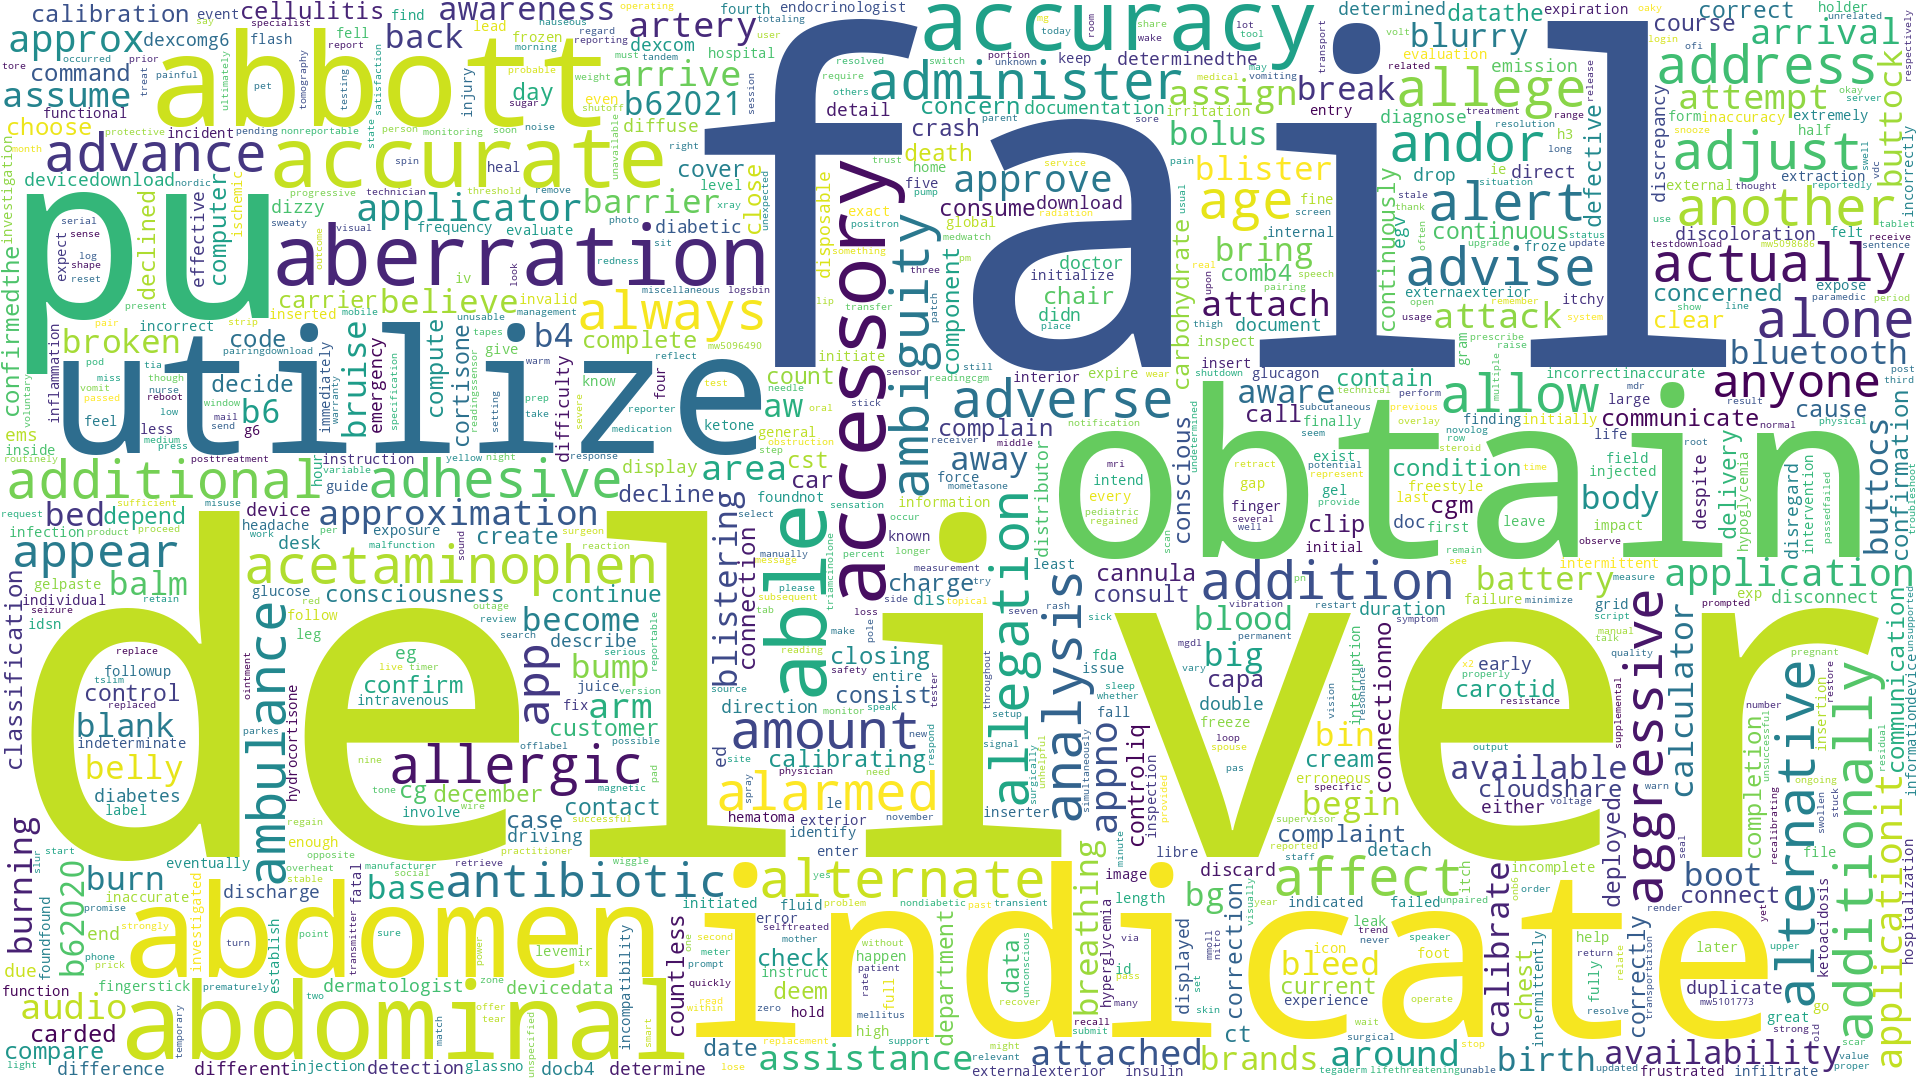

In [10]:
# Join the different processed titles together.
long_string = ','.join(tokens_nonumbers)

# Create a WordCloud object
wordcloud = WordCloud(
    background_color="white", 
    max_words=5000, 
    contour_width=3, 
    contour_color='steelblue', 
    width=1920, 
    height=1080)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()